In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Описание проектной задачи

Необходимо научиться предсказывать с помощью модели линейной регрессии итоговую оценку ученика в году.

Для решения задачи есть набор данных с информацией про успеваемость по математике 395
 учеников двух португальских школ. Каждый ученик описывается большим набором факторов, подробное описание которых приведено дальше. Данные были собраны в период 2005–2006
 учебного года.

In [2]:
# загрузка данных
data = pd.read_csv('student-mat.csv')
data.head(10)

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,3,4,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,3,10,7,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,5,2,15,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,5,4,6,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,yes,no,5,4,2,5,10,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,yes,no,4,4,4,3,0,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,4,1,6,6,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,yes,no,4,2,2,1,0,16,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,yes,no,5,5,1,5,0,14,15


### Факторы:
* school — школа, в которой учится ученик (бинарный: GP — Gabriel Pereira или MS — Mousinho da Silveira).
* gender — пол ученика (бинарный: F — женский или M — мужской).
* age — возраст ученика (численный: от 15 до 22).
* address — тип местности, в которой живёт ученик (бинарный: U — город или R — пригород).
* famsize — размер семьи (бинарный: LE3 — «не больше 3 человек» или GT3 — «больше 3 человек»).
* Pstatus — семейный статус родителей (бинарный: T — «живут вместе» или A — «живут раздельно»).
* Medu — образование матери (численный: 0 — «нет образования», 1 — «начальная школа» (4 класса), 2 — «от 5 до 9 классов», 3 — «среднее образование» или 4 — «высшее образование»).
* Fedu — образование отца (численный: 0 — «нет образования», 1 — «начальная школа» (4 класса), 2 — «от 5 до 9 классов», 3 — «среднее образование» или 4 — «высшее образование»).
* Mjob — работа матери (категориальный: teacher — «учитель», health — «работа в здравоохранении», services — «гражданская служба», at_home — «домохозяйка» или другое — «другое»).
* Fjob — работа отца (категориальный: teacher — «учитель», health — «работа в здравоохранении», services — «гражданская служба», at_home — «домохозяин» или другое — «другое»).
* reason — причина выбора этой школы (категориальный: home — «близко к дому», reputation — «репутация школы», course — «выбор предметов» или other — «другое»).
* guardian — попечитель ученика (категориальный: mother — «мать», father — «отец» или other — «кто-то другой»).
* traveltime — время в пути от дома до школы (численный: 1 — «меньше 15 минут», 2 — «от 15 до 30 минут», 3 — «от 30 минут до 1 часа» или 4 — «больше 1 часа»).
* studytime — время на учёбу в неделю (численный: 1 — «меньше 2 часов», 2 — «от 2 до 5 часов», 3 — «от 5 до 10 часов» или 4 — «больше 10 часов»).
* failures — число незачётов по предмету в прошлом (численный: от 0 до 3).
* schoolsup — дополнительная образовательная поддержка (бинарный: yes — да или no — нет).
* famsup — дополнительная семейная поддержка (бинарный: yes — да или no — нет).
* paid — дополнительные занятия по предмету (бинарный: yes — да или no — нет).
* activities — внеучебная деятельность (бинарный: yes — да или no — нет).
* nursery — ходил в подготовительную школу (бинарный: yes — да или no — нет).
* higher — планирует получать высшее образование (бинарный: yes — да или no — нет).
* internet — есть доступ к интернету дома (бинарный: yes — да или no — нет).
* romantic — есть вторая половинка (бинарный: yes — да или no — нет).
* famrel — отношения в семье (численный: от 1 — «очень плохие» до 5 — «очень хорошие»).
* freetime — свободное время после школы (численный: от 1 — «очень мало» до 5 — «очень много»).
* goout — время с друзьями (численный: от 1 — «очень мало» до 5 — «очень много»).
* health — состояние здоровья (численный: от 1 — «очень плохое» до 5 — «очень хорошее»).
* absences — число пропусков занятий (численный: от 0 до 93).
* G1 — оценка за первый учебный период (численный: от 0 до 20).
### Предсказываемая характеристика:
G3 — итоговая оценка (численный: от 0 до 20).

# Разделение на обучающую и тестовую выборки

В данных есть категориальные признаки, которые вероятно будут влиять на предсказываемое значение, поэтому решено сначала разделить выборки, а потом перейти к анализу и подготовке факторов, так как в ходе решения будет использоваться целевое кодирование, которое лучше выполнять на обучающей выборке.

<Axes: xlabel='G3', ylabel='Count'>

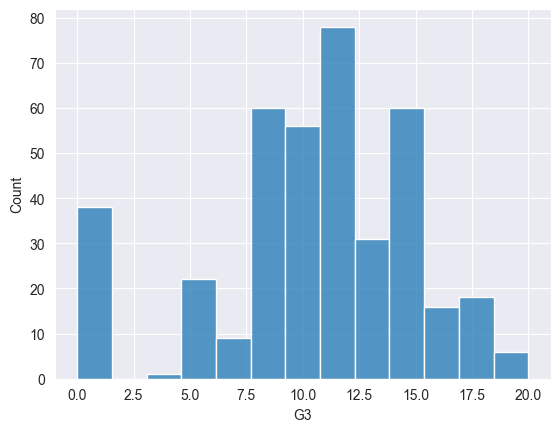

In [3]:
# распределение значений предсказываемого фактора
sns.histplot(data['G3'])

В данных имеются выбросы: в предсказываемом факторе есть большое количество со значением "0", то есть ученик получил 0, как итоговую оценку. Таких данных не может быть так много (40 значений), и по графику видно, что промежуточных значений 0-2.5 вообще нет, значит это вероятно выбросы.

In [4]:
# удаляем выбросы
data = data[data['G3'] != 0]
print(len(data))

357


Данных не так много, поэтому ограничимся только обучающей и тестовой выборками

In [5]:
# разделяем факторы от предсказываемого признака
X = data.drop('G3', axis=1)
y = data['G3']

In [6]:
from sklearn.model_selection import train_test_split

# делим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, random_state=42)

In [7]:
print(len(X_train), len(X_test))

300 57


# Исследовательский анализ

In [8]:
# создаём копию тестовой выборки и добавляем колонку с предсказываемым значением
data_train = X_train.copy(deep=True)
data_train['y'] = y_train
data_train.head(10)

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,y
116,GP,M,15,U,GT3,T,4,4,other,teacher,...,yes,no,no,4,4,3,2,2,11,14
76,GP,M,15,U,GT3,T,4,0,teacher,other,...,yes,yes,no,3,4,3,1,8,11,10
273,GP,M,17,R,GT3,T,1,2,at_home,at_home,...,yes,no,yes,3,5,2,1,2,15,14
63,GP,F,16,U,GT3,T,4,3,teacher,health,...,yes,yes,no,3,4,4,4,2,10,9
46,GP,F,16,U,LE3,A,3,3,other,services,...,yes,yes,no,2,3,5,3,12,11,11
228,GP,M,18,U,LE3,T,2,1,at_home,other,...,yes,yes,yes,4,3,2,3,14,10,9
77,GP,F,16,U,GT3,T,2,2,other,other,...,yes,yes,yes,5,2,3,3,0,11,11
72,GP,F,15,R,GT3,T,1,1,other,other,...,yes,yes,yes,3,3,4,5,2,8,5
84,GP,F,15,U,GT3,T,1,1,other,other,...,yes,yes,no,4,3,2,4,2,9,10
380,MS,M,18,U,GT3,T,4,4,teacher,teacher,...,yes,yes,no,3,2,4,2,4,15,14


In [9]:
# получаем числовые факторы
numeric_factors = data_train.select_dtypes(include=[np.int64]).columns
print(len(numeric_factors))

13


<Axes: >

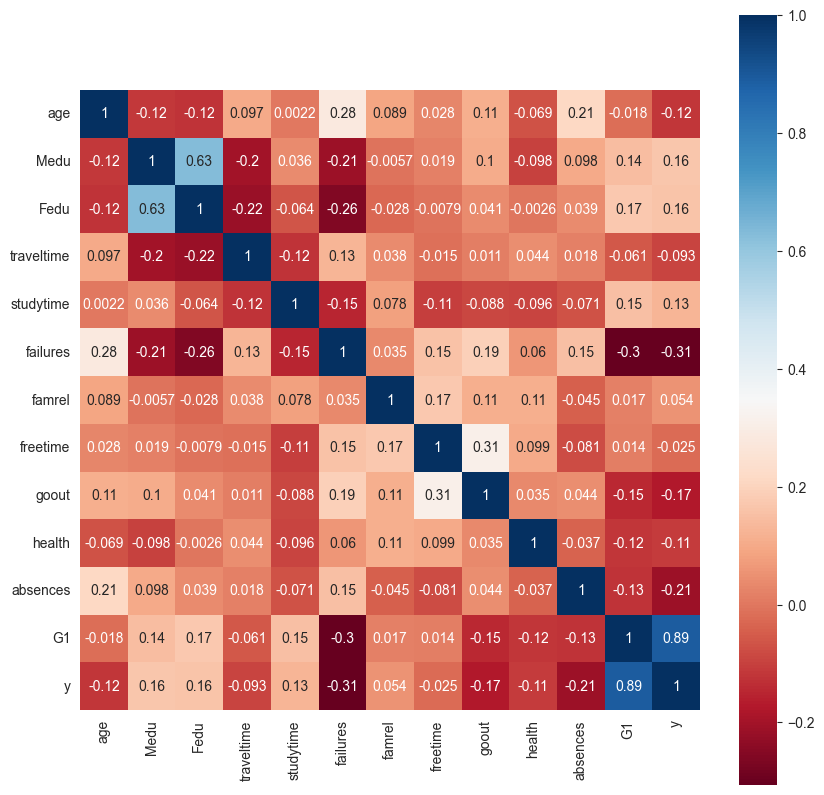

In [10]:
# считаем и выводим тепловую карту корреляций
corr = data_train[numeric_factors].corr()

plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap='RdBu', annot=True, square=True)

Корреляция показывает, что есть сильная линейная зависимость у фактора 'G1' (оценка за первый учебный период) и небольшая у 'failures' (число незачётов по предмету в прошлом) и у 'absences' между предсказываемым признаком. Так же видно, что остальные факторы не сильно, но влияют на предсказываемый значение и что между собой факторы не имеют сильную зависимость.

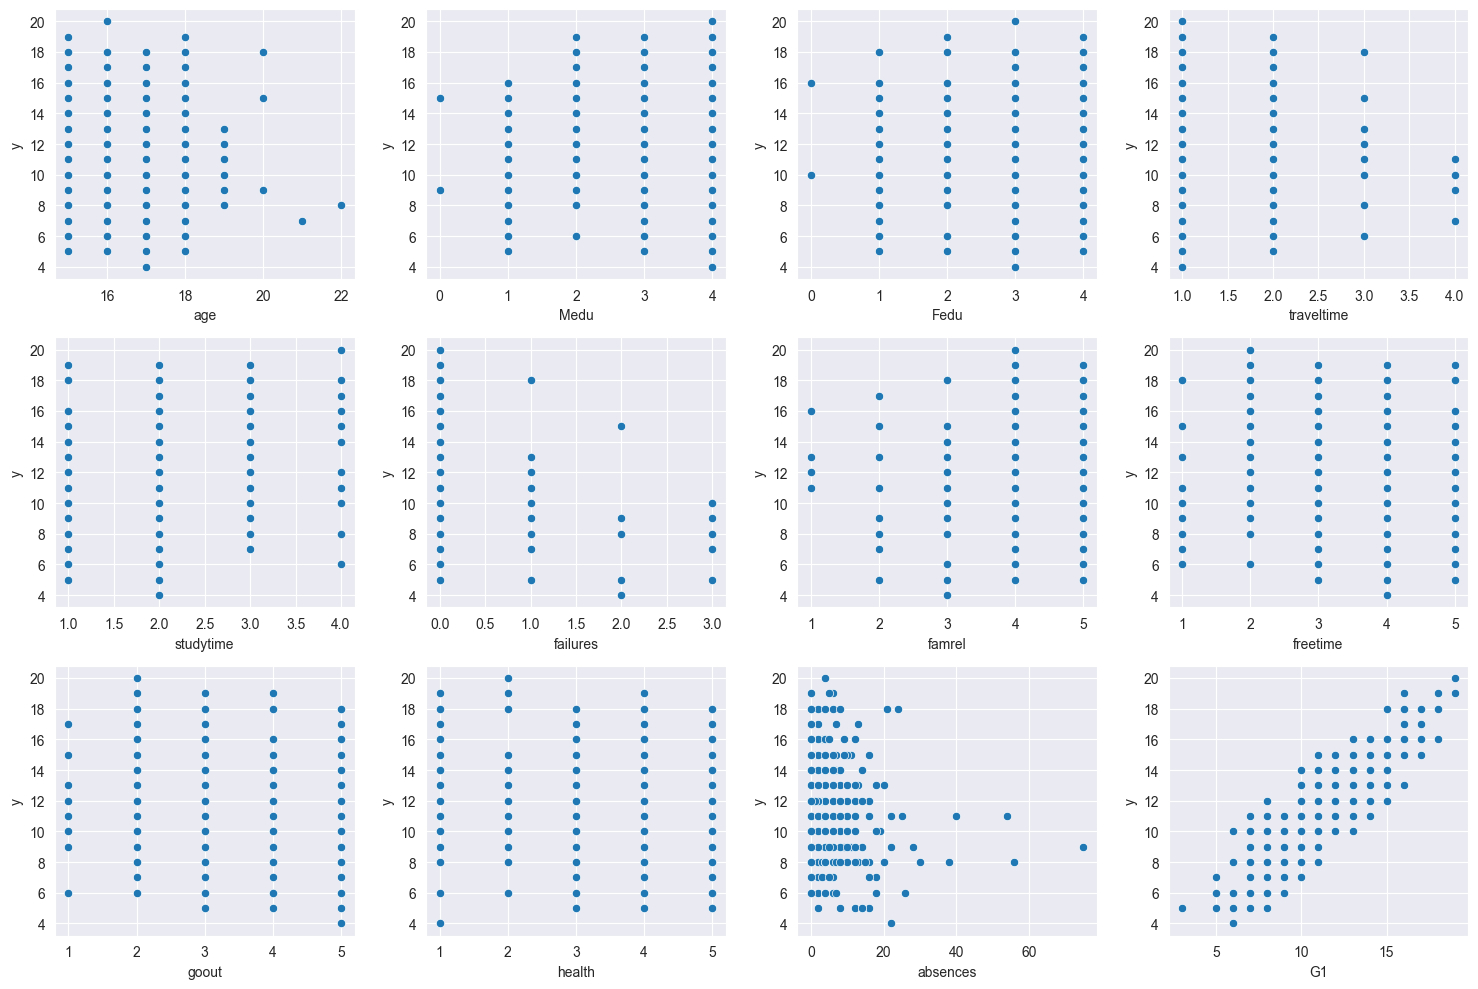

In [11]:
# для каждого числового фактора выводим график к предсказываемому признаку для нахождения каких-то нелинейных зависимостей
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for ax, col in zip(axes.flatten(), numeric_factors.drop('y')):
    sns.scatterplot(data_train, x=col, y='y', ax=ax)
plt.tight_layout()

Анализируя графики численных признаков, можно заметить, что 'G1' линейно влияет на предсказываемое значение. Так же видно, что все численные признаки в зависимости от значения влияют на итоговую оценку.

In [12]:
# получаем категориальные факторы
categorical_factors = data_train.columns.drop(numeric_factors)
print(len(categorical_factors))

17


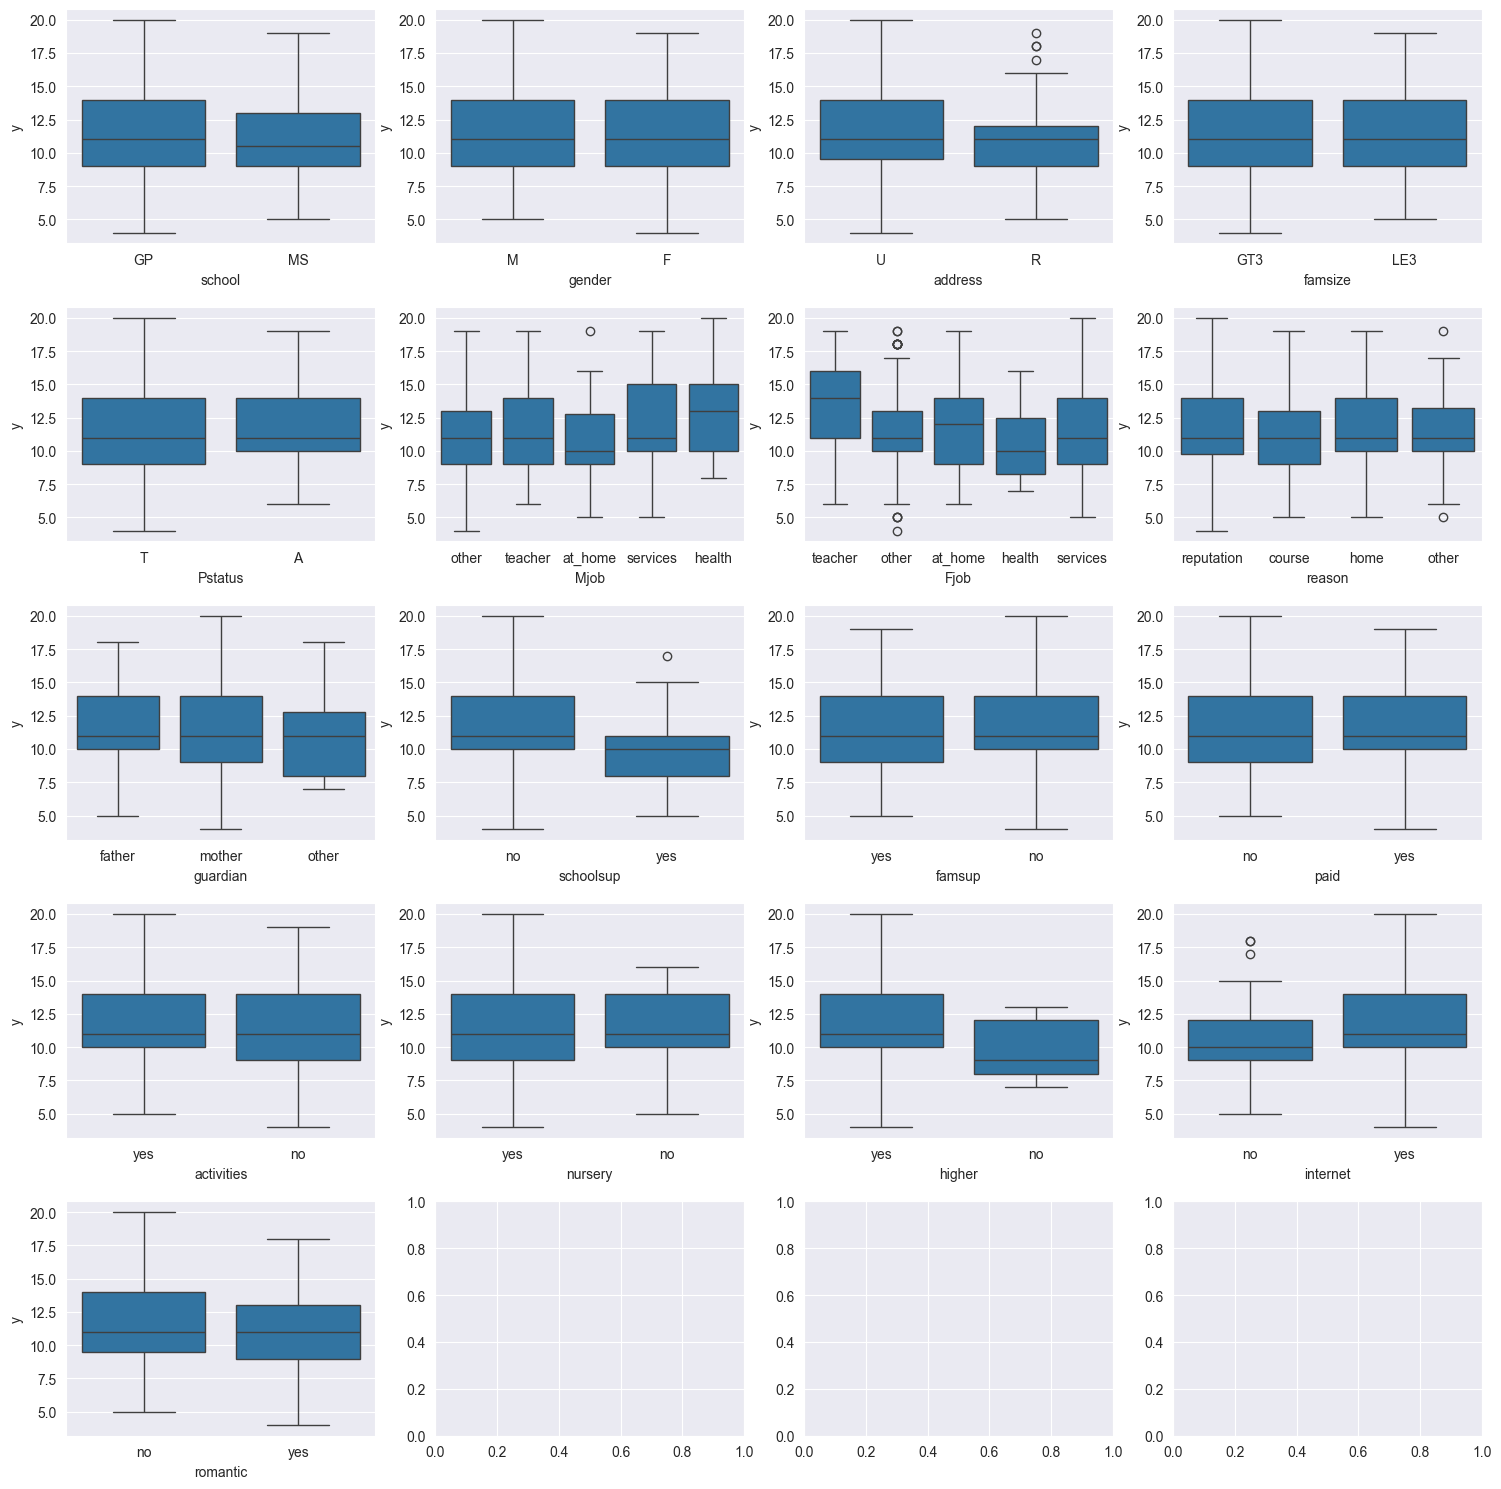

In [13]:
# для каждого категориального фактора выводим график распределения к предсказываемому значению, чтобы понять какие факторы от своего значения влияют на предсказываемый признак и какие целесообразно взять для подсчёта целевого кодирование по среднему значению
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))
for ax, col in zip(axes.flatten(), categorical_factors):
    sns.boxplot(data_train, x=col, y='y', ax=ax)
plt.tight_layout()

Анализируя распределение категориальных признаков, можно заметить, что только 'school', 'Mjob', 'Fjob', 'schoolsup', 'higher' и 'internet' в зависимости от значения имеют разное среднее предсказываемого фактора, то есть могут влиять на него.

In [14]:
# выбираем интересующие нас категориальные факторы
interesting_categorical_factors = ['school', 'Mjob', 'Fjob', 'schoolsup', 'higher', 'internet']

# Подготовка факторов

In [15]:
from category_encoders.target_encoder import TargetEncoder

In [16]:
# обучение кодировщиков для последующего преоразования категориальных факторов
school_encoder = TargetEncoder()
school_encoder.fit(data_train['school'], data_train['y'])

Mjob_encoder = TargetEncoder()
Mjob_encoder.fit(data_train['Mjob'], data_train['y'])

Fjob_encoder = TargetEncoder()
Fjob_encoder.fit(data_train['Fjob'], data_train['y'])

schoolsup_encoder = TargetEncoder()
schoolsup_encoder.fit(data_train['schoolsup'], data_train['y'])

higher_encoder = TargetEncoder()
higher_encoder.fit(data_train['higher'], data_train['y'])

internet_encoder = TargetEncoder()
internet_encoder.fit(data_train['internet'], data_train['y'])

TargetEncoder(cols=['internet'])

Мы обучаем кодировщики на обучающей выборке, чтобы избежать ситуации, когда при целевом кодировании факторов в модель попадает информация про реальное значение целевой характеристики на тестовой выборке, поэтому мы сначала разделили выборки.

In [17]:
# целевое кодирование категориальных факторов
data_train['school_encoded'] = school_encoder.transform(data_train['school'])
data_train['Mjob_encoded'] = Mjob_encoder.transform(data_train['Mjob'])
data_train['Fjob_encoded'] = Fjob_encoder.transform(data_train['Fjob'])
data_train['schoolsup_encoded'] = schoolsup_encoder.transform(data_train['schoolsup'])
data_train['higher_encoded'] = higher_encoder.transform(data_train['higher'])
data_train['internet_encoded'] = internet_encoder.transform(data_train['internet'])

In [18]:
data_train.head(10)

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,y,school_encoded,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded,internet_encoded
116,GP,M,15,U,GT3,T,4,4,other,teacher,...,2,2,11,14,11.563910,11.083396,12.532024,11.816406,11.572917,10.571107
76,GP,M,15,U,GT3,T,4,0,teacher,other,...,1,8,11,10,11.563910,11.653771,11.325000,11.816406,11.572917,11.694779
273,GP,M,17,R,GT3,T,1,2,at_home,at_home,...,1,2,15,14,11.563910,10.706591,11.685831,11.816406,11.572917,10.571107
63,GP,F,16,U,GT3,T,4,3,teacher,health,...,4,2,10,9,11.563910,11.653771,11.194125,9.791090,11.572917,11.694779
46,GP,F,16,U,LE3,A,3,3,other,services,...,3,12,11,11,11.563910,11.083396,11.381144,11.816406,11.572917,11.694779
228,GP,M,18,U,LE3,T,2,1,at_home,other,...,3,14,10,9,11.563910,10.706591,11.325000,9.791090,11.572917,11.694779
77,GP,F,16,U,GT3,T,2,2,other,other,...,3,0,11,11,11.563910,11.083396,11.325000,11.816406,11.572917,11.694779
72,GP,F,15,R,GT3,T,1,1,other,other,...,5,2,8,5,11.563910,11.083396,11.325000,9.791090,11.572917,11.694779
84,GP,F,15,U,GT3,T,1,1,other,other,...,4,2,9,10,11.563910,11.083396,11.325000,11.816406,11.572917,11.694779
380,MS,M,18,U,GT3,T,4,4,teacher,teacher,...,2,4,15,14,11.074655,11.653771,12.532024,11.816406,11.572917,11.694779


In [19]:
# собираем все факторы, которые будут использоваться для обучения модели
factors_to_use = numeric_factors.drop('y').tolist() + ['school_encoded', 'Mjob_encoded', 'Fjob_encoded', 'schoolsup_encoded', 'higher_encoded', 'internet_encoded']
print(factors_to_use)

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'school_encoded', 'Mjob_encoded', 'Fjob_encoded', 'schoolsup_encoded', 'higher_encoded', 'internet_encoded']


In [20]:
# копируем обучающую выборки с нужными факторами
X_train_encoded = data_train.copy(deep=True)[factors_to_use]
X_train_encoded.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,school_encoded,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded,internet_encoded
116,15,4,4,2,2,0,4,4,3,2,2,11,11.563910,11.083396,12.532024,11.816406,11.572917,10.571107
76,15,4,0,2,4,0,3,4,3,1,8,11,11.563910,11.653771,11.325000,11.816406,11.572917,11.694779
273,17,1,2,1,2,0,3,5,2,1,2,15,11.563910,10.706591,11.685831,11.816406,11.572917,10.571107
63,16,4,3,1,3,0,3,4,4,4,2,10,11.563910,11.653771,11.194125,9.791090,11.572917,11.694779
46,16,3,3,1,2,0,2,3,5,3,12,11,11.563910,11.083396,11.381144,11.816406,11.572917,11.694779
228,18,2,1,4,2,0,4,3,2,3,14,10,11.563910,10.706591,11.325000,9.791090,11.572917,11.694779
77,16,2,2,1,4,0,5,2,3,3,0,11,11.563910,11.083396,11.325000,11.816406,11.572917,11.694779
72,15,1,1,1,2,2,3,3,4,5,2,8,11.563910,11.083396,11.325000,9.791090,11.572917,11.694779
84,15,1,1,1,2,0,4,3,2,4,2,9,11.563910,11.083396,11.325000,11.816406,11.572917,11.694779
380,18,4,4,1,2,0,3,2,4,2,4,15,11.074655,11.653771,12.532024,11.816406,11.572917,11.694779


In [21]:
from sklearn.preprocessing import MinMaxScaler

# создаём объект, который масштабирует факторы от 0 до 1 (0 и 1 - минимальное и максимальное значение соответственно),
# и обучаем его на обучающей выборке
scaler = MinMaxScaler()
scaler.fit(X_train_encoded)

MinMaxScaler()

С масштабатором такая же ситуация, как с кодировщиками: обучаем его на обучающей выборке, чтобы избежать попадания информации о тестовой выборке

In [22]:
# масштабируем обучающую выборку
X_train_scaled = scaler.transform(X_train_encoded)

# Создание модели и обучение модели

Для модели мы выбрали модель линейной регрессии, так как из исследовательского анализа заметили, что фактор 'G1' (оценка за первый триместр) линейно коррелирует с предсказываемой характеристикой, как некоторые другие признаки, но гораздо слабее.

In [23]:
from sklearn.linear_model import LinearRegression

# создаем модель линейной регрессии
model = LinearRegression()

In [24]:
# обучаем модель на обучающей выборке
model.fit(X_train_scaled, y_train)

LinearRegression()

In [25]:
# оцениваем точность модели по метрике R^2
model.score(X_train_scaled, y_train)

0.8292117743922803

Оценка качества показывает, что точно модели на обучающей выборки достаточно высокая, поэтому можно приступить к оценки её качества на тестовой выборке

# Оценка качества модели

In [26]:
# преобразуем категориальные факторы тестовой выборки с помощью целевого кодирования
X_test['school_encoded'] = school_encoder.transform(X_test['school'])
X_test['Mjob_encoded'] = Mjob_encoder.transform(X_test['Mjob'])
X_test['Fjob_encoded'] = Fjob_encoder.transform(X_test['Fjob'])
X_test['schoolsup_encoded'] = schoolsup_encoder.transform(X_test['schoolsup'])
X_test['higher_encoded'] = higher_encoder.transform(X_test['higher'])
X_test['internet_encoded'] = internet_encoder.transform(X_test['internet'])

In [27]:
# выбираем нужные факторы
X_test = X_test[factors_to_use]
X_test.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,school_encoded,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded,internet_encoded
243,16,4,4,1,1,0,5,3,2,5,0,13,11.563910,12.073570,11.381144,11.816406,11.572917,11.694779
42,15,4,4,1,2,0,4,3,3,5,2,19,11.563910,12.073570,12.532024,11.816406,11.572917,11.694779
319,18,4,4,1,2,0,4,4,4,5,2,11,11.563910,11.653771,11.325000,11.816406,11.572917,11.694779
328,17,4,4,1,3,0,5,4,4,4,7,10,11.563910,11.653771,11.381144,11.816406,11.572917,11.694779
56,15,4,3,1,2,0,4,3,2,1,0,14,11.563910,12.073570,11.381144,11.816406,11.572917,11.694779
370,19,3,2,2,2,2,3,2,2,3,4,7,11.074655,12.073570,11.381144,11.816406,11.572917,10.571107
15,16,4,4,1,1,0,4,4,4,2,4,14,11.563910,12.183447,11.325000,11.816406,11.572917,11.694779
57,15,4,4,1,2,0,3,2,2,5,4,14,11.563910,11.653771,11.194125,11.816406,11.572917,10.571107
270,19,3,3,1,2,2,4,3,5,5,15,9,11.563910,11.083396,11.381144,11.816406,11.572917,11.694779
124,16,2,2,1,2,0,5,4,4,5,0,8,11.563910,11.083396,11.325000,11.816406,11.572917,11.694779


In [28]:
# масштабируем факторы тестовой выборки
X_test_scaled = scaler.transform(X_test)

In [29]:
# оцениваем модель на тестовой выборке с помощью метрики R^2
model.score(X_test_scaled, y_test)

0.7972132464802961

Оценка качества модели на тестовой выборке оказалась чуть ниже, чем на обучающей, но осталась на достаточно высоком уровне. Так как у нас довольно маленькая тестовая выборка, следует построить доверительный интервал точности модели методом бутстрапа. По ширине доверительного интервала точности можно сделать вывод, насколько полезной разработанная модель могла бы оказаться на практике. В частности, можно считать, что в худшем случае реальная точность модели соответствует её точности на том краю доверительного интервала, где достигается наиболее негативное с точки зрения практического смысла значение метрики.

In [30]:
from sklearn.metrics import mean_absolute_error

# считаем метрику MAE (средняя абсолютная ошибка)
y_pred = model.predict(X_test_scaled)
print(mean_absolute_error(y_test, y_pred))

1.18418467547188


Значение MAE показывает: в среднем модель ошибается на 1.18 от реального значения, что не плохой результат. Это один из плюсов этой метрики - интерпритируемость.

In [31]:
# создаём таблицу с реальным и предсказанным значением, чтобы провести бутстрап
y_test_pred = pd.DataFrame({'test': y_test, 'pred': y_pred})

In [32]:
# создаём массив, в которых будет хранить значения получившихся метрик
maes = []

# длина бутстрап-выборок
n = len(y_test_pred)
for _ in range(1000):
    # случайно генерируем выборку
    y_test_pred_sample = y_test_pred.sample(n, replace=True)

    # добавляем метрику на выборке в массив
    maes.append(mean_absolute_error(y_test_pred_sample['test'], y_test_pred_sample['pred']))

In [33]:
# убираем с концов 2.5% для получения более узкого интервала
maes = sorted(maes)[25:975]

In [34]:
print(maes[0], maes[-1])

0.9798084892451787 1.3872201886947453


<Axes: ylabel='Count'>

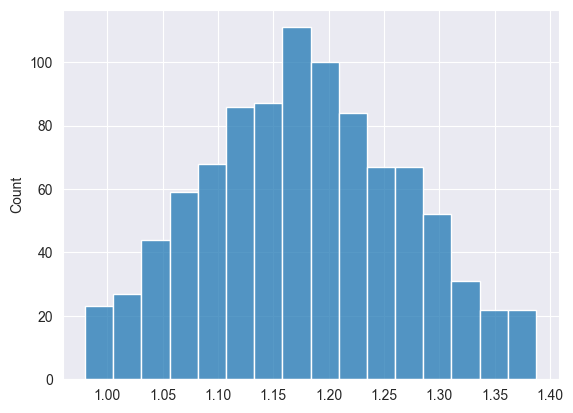

In [35]:
sns.histplot(maes)

Доверительный интервал принимает значения [1:1.4], что показывает в каком диапазоне находится реальная точность модели. В худшем случае, например, реальная точность модели будет равна "1.4".

# Интерпретация модели

In [36]:
for factor, coef in zip(X_train_encoded, model.coef_):
    print(factor, round(coef, 2))

age -1.17
Medu 0.32
Fedu -0.24
traveltime -0.3
studytime -0.3
failures 0.04
famrel 0.82
freetime -0.63
goout -0.5
health -0.18
absences -3.09
G1 13.66
school_encoded 0.48
Mjob_encoded 0.34
Fjob_encoded 0.14
schoolsup_encoded 0.31
higher_encoded -0.62
internet_encoded 0.46


Один из плюсов модели линейной регрессии - это её интерпритируемость, можно посмотреть какие закономерности нашла модель между факторами и предсказываемой характеристикой. Анализируя веса модели, заметно, что сильнее всего на предсказываемую характеристику влияет 'G1' (оценка за первый триместр) и меньшие веса имеют факторы: absences (число пропусков), age (возраст) и famrel (отношение в семье). Остальные факторы имеют достаточно маленькие веса (<0.8), чтобы точно утверждать, правильно ли модель нашла зависимости, и их вклад в предсказываемое значение небольшой.